<a href="https://colab.research.google.com/github/andersknudby/Teledetection/blob/master/Chapitre_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapitre 5 - Lecture et écriture de fichiers
L'une des choses les plus fondamentales que vous devez être capable de faire lorsque vous programmez est de lire et d'écrire des fichiers. En télédétection, les images avec lesquelles vous travaillez sont stockées dans des fichiers, tout comme leurs métadonnées. Et une fois que vous avez fait ce que vous deviez faire avec l'imagerie, l'écriture des résultats dans un fichier est presque toujours la façon dont vous voulez sauvegarder les résultats pour une utilisation ultérieure. Ces carnets vous apprendront à lire et à écrire trois types de fichiers différents : les fichiers texte, les fichiers image (données matricielles) et les fichiers de forme (données vectorielles). Nous aborderons les fichiers texte dans ce chapitre, les fichiers image dans le chapitre suivant, et les fichiers de forme par la suite.

Comme nous allons travailler avec des fichiers, nous devons configurer Colab pour qu'il puisse accéder à certains fichiers à partir d'un emplacement auquel vous avez également accès. C'est facile lorsque vous écrivez du code Python sur votre propre ordinateur, mais un peu plus délicat avec Colab car votre code existe quelque part sur un serveur Google. Pour que cela fonctionne, nous allons donner à Colab l'accès aux fichiers de notre Google Drive (si vous êtes préoccupé par la confidentialité, cela peut vous sembler inquiétant, mais n'oubliez pas que Google a déjà accès à tous les fichiers de votre Google Drive - ces fichiers ne seront pas différents).

Pour donner à Colab un accès de base à votre Google Drive, nous devons exécuter quelques lignes de code, comme indiqué ci-dessous. Lorsque vous effectuez cette opération la première fois, un lien s'affiche, qui vous conduit à la page de connexion de Google Drive, laquelle vous amène à un code d'authentification, que vous copiez (à l'aide de la petite icône sur cette page) et collez (en utilisant Ctrl+V) dans le champ qui s'affiche également ci-dessous. Lorsque vous referez cette opération plus tard, vous n'aurez pas besoin de repasser par les mêmes étapes. Faites-en l'essai maintenant :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

J'ai placé tous les fichiers dont j'ai besoin pour ce cours dans un dossier appelé "Python files". Pour faciliter le suivi des autres exemples, je vous suggère de faire de même. N'oubliez pas que les noms de fichiers sont également sensibles à la casse, de sorte que le "P" de Python doit être en majuscules. Pour faciliter l'accès à ces informations dans le reste de mon code, j'écris une sorte de raccourci comme ceci :

In [ ]:
myDir = '/content/drive/My Drive/Python files/'

L'un des fichiers de ce dossier s'appelle 'sfu.tif'. Pour vérifier si j'ai tout fait correctement, je vérifie si Python croit que ce fichier existe, en utilisant la fonction 'os.path.exists'. Cela ne fonctionnera évidemment que si vous avez effectivement un dossier dans votre Google Drive appelé "Python files", et s'il y a un fichier appelé "sfu.tif" dans ce dossier !

In [ ]:
import os
if os.path.exists(myDir + 'sfu.tif'):
  print("Drive mounted and directory found")
else:
  print("No access to the files")

Vous devrez répéter le processus ci-dessus lorsque vous commencerez une nouvelle session Colab.

Pour travailler avec des fichiers, vous devez créer un objet 'file', qui est un objet spécial que Python utilise pour lire et écrire dans des fichiers. Vous créez cet objet avec la fonction 'open()', comme suit :

In [ ]:
file = open(myDir + "blabla.txt", "r")

Si vous exécutez le bloc de code ci-dessus, il produira une erreur. Lisez le message d'erreur et vous verrez qu'il indique 'FileNotFoundError'... ce qui est dû au fait qu'il n'y a pas de fichier appelé 'blabla.txt' dans monDir.

Néanmoins, dans la ligne de code ci-dessus, 'file' est le nom du nouvel objet fichier, 'open' est la fonction 'open' de Python, 'blabla.txt' est le nom du fichier, et 'r' définit le but pour lequel le fichier est ouvert. Les fichiers peuvent être ouverts en lecture seule (ce qui vous permet de vous assurer que vous ne modifiez pas accidentellement le contenu du fichier), en écriture (qui supprime d'abord le contenu du fichier, puis le remplace par ce que vous y écrivez), en ajout (écriture sans supprimer d'abord le contenu existant), et des combinaisons de ce qui précède.

##Écrire dans un fichier texte
Pour nous entraîner un peu, la première chose que nous allons faire est de créer un fichier et d'y écrire quelque chose. Personnellement, je préfère faire la création de fichier en deux étapes, en définissant d'abord le nom du fichier, puis en l'utilisant pour créer le fichier. Première étape, créer le nom du fichier, et vérifier qu'il fonctionne bien :

In [ ]:
fileName = myDir + "blabla.txt"
print(fileName)

Deuxième étape, ouvrir le fichier en écriture, y écrire quelque chose, puis le refermer (la fermeture est importante !):

In [ ]:
f = open(fileName, "w")
f.write("This is just a test")
f.close()

Notez que, comme nous travaillons dans Colab, le fichier appelé "blabla.txt" n'est pas encore visible dans votre Google Drive. Pour que cela se produise, vous devez exécuter une commande spéciale qui prend tout ce que vous avez fait dans votre code et l'écrit dans Google Drive :

In [ ]:
drive.flush_and_unmount()

Vous devriez maintenant pouvoir accéder à votre Google Drive et ouvrir un fichier appelé "blabla.txt" pour voir ce qu'il contient.

**Important** : notez que lorsqu'elle est utilisée avec "w", la fonction "open" essaiera d'ouvrir un fichier existant, mais si ce n'est pas le cas, elle créera un fichier vide pour y écrire. Si un fichier existe déjà, l'ouvrir avec "w" écrasera le contenu existant, alors utilisez cette fonction avec précaution !

Une chose à garder à l'esprit lorsque vous écrivez plus d'une ligne dans un fichier est que lorsque le fichier a été ouvert pour l'écriture, l'objet fichier a l'équivalent d'un "curseur" - des informations qui déterminent où dans le fichier la prochaine chose à écrire va être écrite. Il existe une fonction en Python qui vous permet de savoir où se trouve le "curseur" à un moment donné, ainsi que d'autres fonctions permettant de déplacer le curseur sans rien écrire. Vous trouverez des informations de base à ce sujet sur [TutorialsPoint](https://www.tutorialspoint.com/python/python_files_io.htm).

Avant de passer à ce code supplémentaire, puisque nous avons utilisé la fonction 'drive.flust_and_unmount(), la première chose que nous devons faire est de remonter notre Google Drive :

In [ ]:
drive.mount('/content/drive')

##Lecture d'un fichier texte
La lecture d'un fichier fonctionne à peu près de la même manière que l'écriture : vous ouvrez le fichier (avec "r" cette fois), vous lisez le texte du fichier et vous le refermez à la fin. Maintenant que nous avons un fichier, nous pouvons essayer de lire son contenu dans une variable de type chaîne. Les deux premières lignes devraient ressembler à ceci :

In [ ]:
fileName = myDir + "blabla.txt"
f = open(fileName, "r")

Le fichier est maintenant ouvert et prêt à être lu. Lorsque vous ouvrez un fichier, le "curseur" est toujours placé au début du fichier. Pour lire quelque chose, vous devez spécifier ce que vous voulez lire. Python possède une fonction 'read()' qui lit un nombre spécifique de caractères :

In [ ]:
text = f.read(10)
print(text)

Il est généralement plus utile de lire une ligne entière à la fois. Nous pouvons le faire avec la fonction readline(), qui lit le reste de la ligne à partir de l'endroit où se trouve le 'curseur'. Rappelez-vous que lorsque vous ouvrez un fichier, le "curseur" se trouve au début du fichier. Cependant, une fois que vous avez utilisé readline() une fois, le curseur sera placé au début de la ligne deux (en supposant qu'il y ait deux lignes ou plus dans le fichier !), donc si vous utilisez readline() à plusieurs reprises, vous lirez une ligne après l'autre dans la bonne séquence. Essayons :

In [ ]:
text = f.readline()
print(text)

Que s'est-il passé ici ? Eh bien, vous aviez déjà lu les 10 premiers caractères du fichier, à savoir 'This is ju' (rappelez-vous que les espaces comptent aussi comme des caractères). Ensuite, vous avez utilisé la fonction readline(), qui a lu *le reste de la ligne*.

Cela peut vite devenir confus. Une façon de réinitialiser la position du curseur est d'utiliser la fonction f.seek(), comme ce qui est montré ci-dessous, mais l'approche la plus simple pour lire des fichiers texte est de les lire ligne par ligne en utilisant la fonction readline().

In [ ]:
f.seek(0,0)
text = f.readline()
print(text)
f.close()

Créons un fichier plus long, afin de nous entraîner à lire des fichiers texte contenant plusieurs lignes. Écrivez et exécutez le code suivant :

In [ ]:
fileName = myDir + "blabla.txt"
f = open(fileName, "w")
f.write ("I know how to create and write to files in Python!" + "\n")
f.write ("The '\\n' character is a code means 'new line'" + "\n")
f.write ("You can add it to the end of a line, like pressing 'Enter'\n")
f.write ("You can add it the way we did in the first line, or the way we did in the previous line")
f.write ("If you want to actually write a 'backslash' followed by an 'n', you need to write an additional 'backslash' before the code\n")
f.write ("Finally, you can include quotes inside quotes by shifting between single and double quotes, as done above")
f.close()

Si vous voulez lire ce fichier ligne par ligne, il existe une belle structure pour le faire. Essayez ceci pour voir comment cela fonctionne :

In [ ]:
fileName = myDir + "blabla.txt"
f = open(fileName, "r")
for line in f:
  print(line)

La structure ci-dessus peut être utile si vous effectuez une recherche dans un fichier pour trouver un élément de texte spécifique. Par exemple, les fichiers de métadonnées Landsat sont des fichiers texte qui contiennent un élément d'information sur chaque ligne. Si nous voulons savoir quelle était l'élévation du soleil (l'angle entre l'horizon et la direction du soleil) lors de l'acquisition d'une image donnée, cette information est fournie sur une seule ligne sous la forme SUN_ELEVATION = xxx.xxx. Voir l'image ci-dessous, qui contient une partie d'un fichier de métadonnées Landsat 8 (il faut chercher parmi toutes les informations pour trouver la partie concernant l'élévation du soleil).

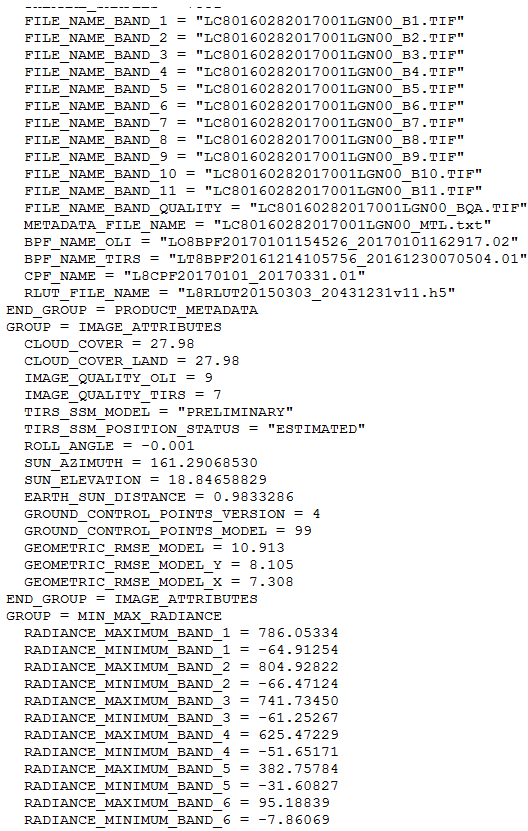

Pour trouver et lire cette valeur dans le fichier, nous pouvons parcourir toutes les lignes jusqu'à ce que nous en trouvions une qui commence par "SUN_ELEVATION", lire cette ligne et utiliser des fonctions de manipulation de chaîne pour lire le nombre situé à droite du signe égal. Le fichier ci-dessus se trouve dans le dossier Python files, et nous pouvons le lire en entier comme ceci :

In [ ]:
fileName = myDir + "LC80160282017001LGN00_MTL.txt"
f = open(fileName, "r")
for line in f:
  print(line, end="")

C'est beaucoup d'informations ! Si nous voulons seulement savoir quelle était l'élévation du soleil au moment de l'acquisition de cette image Landsat, c'est-à-dire à quelle distance au-dessus de l'horizon se trouvait le soleil, vu par une personne se tenant au centre de l'image au moment de son acquisition, nous n'avons pas besoin de toutes ces informations. Nous avons juste besoin de la ligne qui commence par "SUN_ELEVATION".

Comme vous pouvez le constater, toutes les lignes du fichier ont la même structure : XXX = YYY. Nous devons donc trouver la ligne où XXX est SUN_ELEVATION. Pour ce faire, nous pouvons utiliser une fonction qui prend une chaîne de caractères et la divise en composants définis par un séparateur. Si nous utilisons un espace comme séparateur, il y a trois composants dans chaque ligne, à savoir 'XXX', '=' et 'YYY'. Nous allons donc diviser chaque ligne et vérifier si le premier composant, à savoir 'XXX', est égal à 'SUN_ELEVATION'. Ceci est fait avec la fonction split(). Dans notre cas, nous ne voulons que le premier composant, et split retourne tous les composants, donc nous allons choisir le premier en ajoutant [0] à la fin.

In [ ]:
fileName = myDir + "LC80160282017001LGN00_MTL.txt"
f = open(fileName, "r")
for line in f:
  XXX = line.split()[0]
  print(XXX)

C'est très bien ! Maintenant, nous devons tester si chaque instance de XXX est égale à SUN_ELEVATION. Et si c'est le cas, nous allons prendre le dernier composant de cette ligne et l'enregistrer comme l'élévation du soleil. Et pendant que nous y sommes, nous allons réduire le nombre d'instructions d'impression pour que la sortie soit moins lourde.

In [ ]:
fileName = myDir + "LC80160282017001LGN00_MTL.txt"
f = open(fileName, "r")
for line in f:
  XXX = line.split()[0]
  if XXX == "SUN_ELEVATION":
    print("Found the right line!")
    sunElevation = line.split()[2]  # We use [2] here because we want the thrid component (remember, Python starts counting at 0)
print("Sun elevation is: " + sunElevation)


Nous avons maintenant trouvé la valeur de l'élévation du soleil dans le fichier de métadonnées. Le seul problème restant, si nous voulions utiliser cette valeur dans certains calculs, est que la valeur est toujours une chaîne de caractères (c'est pourquoi nous avons pu l'imprimer ci-dessus sans utiliser le wrapper str() autour d'elle. Vous pouvez vérifier cela avec 'type(sunElevation)' si vous le souhaitez. Pour changer la valeur en flottant, il suffit d'ajouter float() à la ligne où nous l'avons récupérée du fichier texte (et d'utiliser str() pour l'imprimer !):

In [ ]:
fileName = myDir + "LC80160282017001LGN00_MTL.txt"
f = open(fileName, "r")
for line in f:
  XXX = line.split()[0]
  if XXX == "SUN_ELEVATION":
    print("Found the right line!")
    sunElevation = float(line.split()[2])  # We use [2] here because we want the thrid component (remember, Python starts counting at 0)
print("Sun elevation is: " + str(sunElevation))

La lecture d'un petit fichier texte est rapide, mais il peut arriver que vous ayez des fichiers très volumineux et que vous souhaitiez ne pas avoir à parcourir chaque ligne lorsque vous avez trouvé ce dont vous avez besoin. Vous pouvez toujours sortir d'une boucle for en utilisant la commande break(). Dans notre exemple, cela ressemblerait à ceci :

In [ ]:
fileName = myDir + "LC80160282017001LGN00_MTL.txt"
f = open(fileName, "r")
for line in f:
  XXX = line.split()[0]
  if XXX == "SUN_ELEVATION":
    print("Found the right line!")
    sunElevation = float(line.split()[2])  # We use [2] here because we want the third component (remember, Python starts counting at 0)
    break
print("Sun elevation is: " + str(sunElevation))

##Exercice
Une autre ligne du fichier de métadonnées contient l'azimut solaire, c'est-à-dire la direction de la boussole du soleil vue du centre de l'image au moment de la capture de l'image. Dans le fichier de métadonnées, le code correspondant est SUN_AZIMUTH. Développez le code ci-dessus pour trouver et lire également l'azimut solaire, et le stocker dans une variable séparée. Faites attention à l'instruction 'break' lorsque vous faites cela ! Imprimez les deux valeurs lorsque vous les avez trouvées.

##Un autre exercice
Au lieu d'imprimer les deux valeurs (élévation solaire et azimut solaire), écrivez-les plutôt dans un fichier texte. Vérifiez le contenu du fichier lorsque vous le trouvez sur votre Google Drive.

##Encore un exercice !
L'angle zénithal solaire est plus souvent utilisé pour les calculs que l'élévation du soleil. L'angle zénithal solaire est l'angle entre le zénith (ligne droite depuis un point donné de la surface de la Terre) et la direction du soleil. Il est facile à calculer : 90 degrés moins l'élévation du soleil. Modifiez le code du dernier exercice pour écrire l'angle zénithal solaire au lieu de l'élévation du soleil. Notez que les calculs ne peuvent être effectués que sur des nombres (pas sur des chaînes de caractères).